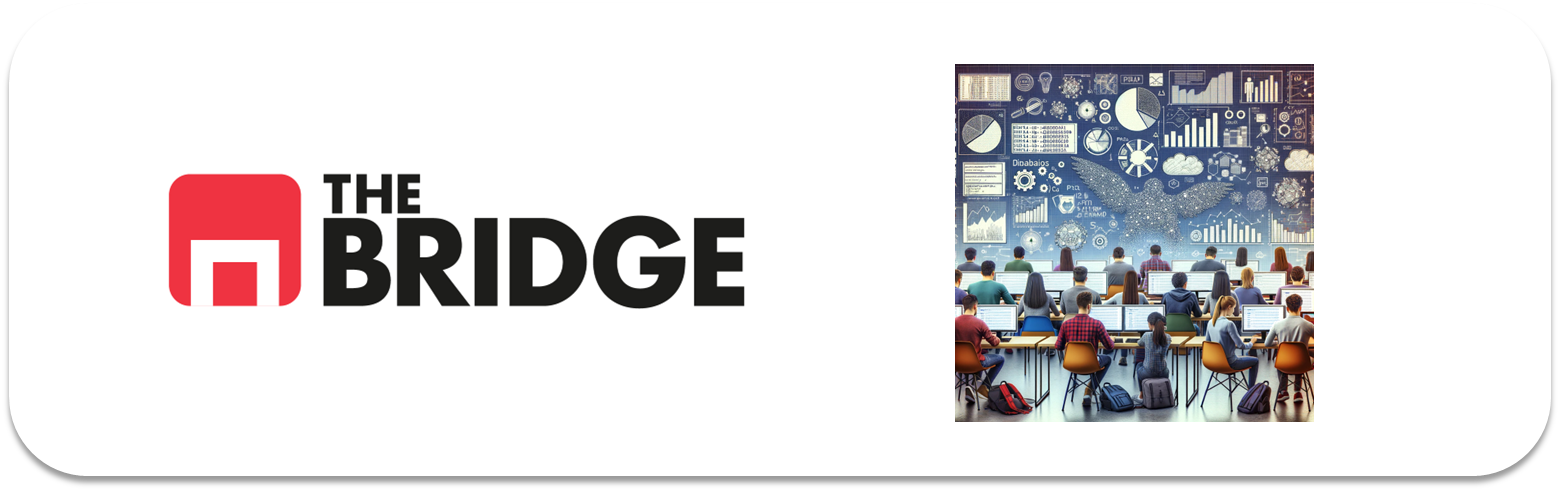

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:
# Cargo el dataset

data = pd.read_csv("data/titanic.csv")

In [3]:
data.sample(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
215,1,1,female,31.00,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
678,0,3,female,43.00,1,6,46.9000,S,Third,woman,False,NaN,Southampton,no,False
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
588,0,3,male,22.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
403,0,3,male,28.00,1,0,15.8500,S,Third,man,True,NaN,Southampton,no,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
737,1,1,male,35.00,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
647,1,1,male,56.00,0,0,35.5000,C,First,man,True,A,Cherbourg,yes,True
255,1,3,female,29.00,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,yes,False
790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
# Me deshago de la columna "deck" ya que hay demasiados nulos

data.drop("deck", axis=1, inplace=True)

# Me deshago también de las columnas duplicadas (alive por survived, embarked por embark_town, pclass por class)
# También me deshago de "adult_male" ya que haremos un one-hot encoding sobre "who" y obtendremos la misma info

data.drop(["alive", "embarked", "adult_male", "class"], axis=1, inplace=True)

In [6]:
# Como se pide que no se hagan imputaciones, para el resto de nulos, me deshago de las filas
# Debido a que hay una cantidad significativa de nulos para "age", perderemos bastantes filas
# Sin embargo, sabemos que la edad tiene un papel significativo, puesto que ya hemos trabajado con este dataset
# En un caso real, deberíamos considerar si nos deshacemos de la columna edad en vez de las filas con nulos
# Eso lo haríamos de la misma manera que con el mini-EDA para la selección de features

data.dropna(inplace=True)

In [7]:
# Convierto las variables no numéricas en numéricas

data.alone = pd.Series(np.where(data.alone.values == True, 1, 0),
          data.index)

data.sex = pd.Series(np.where(data.sex.values == "female", 1, 0),
          data.index)

data = pd.get_dummies(data, columns=['who', 'embark_town'], dtype='int') # one-hot encoding

data.sample(15)

,survived,pclass,sex,age,sibsp,parch,fare,alone,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
276,0,3,1,45.0,0,0,7.7500,1,0,0,1,0,0,1
342,0,2,0,28.0,0,0,13.0000,1,0,1,0,0,0,1
583,0,1,0,36.0,0,0,40.1250,1,0,1,0,1,0,0
820,1,1,1,52.0,1,1,93.5000,0,0,0,1,0,0,1
569,1,3,0,32.0,0,0,7.8542,1,0,1,0,0,0,1
402,0,3,1,21.0,1,0,9.8250,0,0,0,1,0,0,1
804,1,3,0,27.0,0,0,6.9750,1,0,1,0,0,0,1
785,0,3,0,25.0,0,0,7.2500,1,0,1,0,0,0,1
805,0,3,0,31.0,0,0,7.7750,1,0,1,0,0,0,1
20,0,2,0,35.0,0,0,26.0000,1,0,1,0,0,0,1


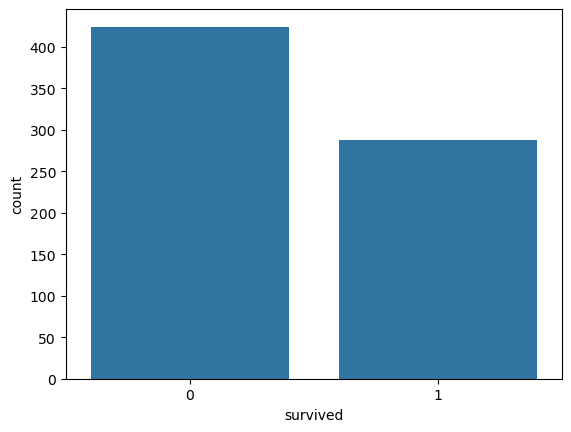

In [8]:
# Analizo la variable target

target = "survived"

sns.countplot(data=data, x=target);

El número de noes no es abismalmente superior al de síes, pero aun así hay una diferencia notable. Tendremos que tener en cuenta esto a la hora de evaluar el modelo, ya que la métrica accuracy podría engañarnos.

In [9]:
# Hago el split train-test, estratificado

X = data.drop([target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

In [10]:
# Mini-EDA

eda = X_train.copy()
eda[target] = y_train.copy()

np.abs(eda.corr()[target]).sort_values(ascending=False)

survived                   1.000000
who_man                    0.565529
sex                        0.544018
who_woman                  0.491759
pclass                     0.336551
fare                       0.251667
alone                      0.207658
embark_town_Cherbourg      0.193477
who_child                  0.164773
embark_town_Southampton    0.161340
parch                      0.108606
age                        0.092778
embark_town_Queenstown     0.034787
sibsp                      0.012078
Name: survived, dtype: float64

In [11]:
corr = np.abs(eda.corr()[target]).sort_values(ascending=False)

# Features con menos de 0.2 de correlación vs el target
bad_corr_feat = corr[corr < 0.2].index.values

# Filtramos las columnas buenas
eda.drop(columns=bad_corr_feat, inplace=True)

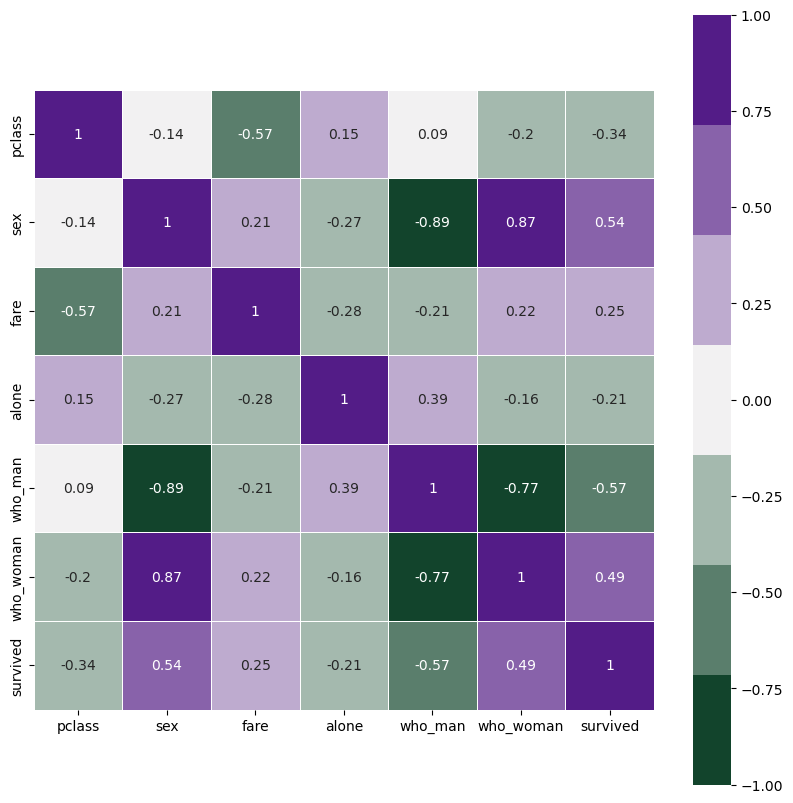

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(eda.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

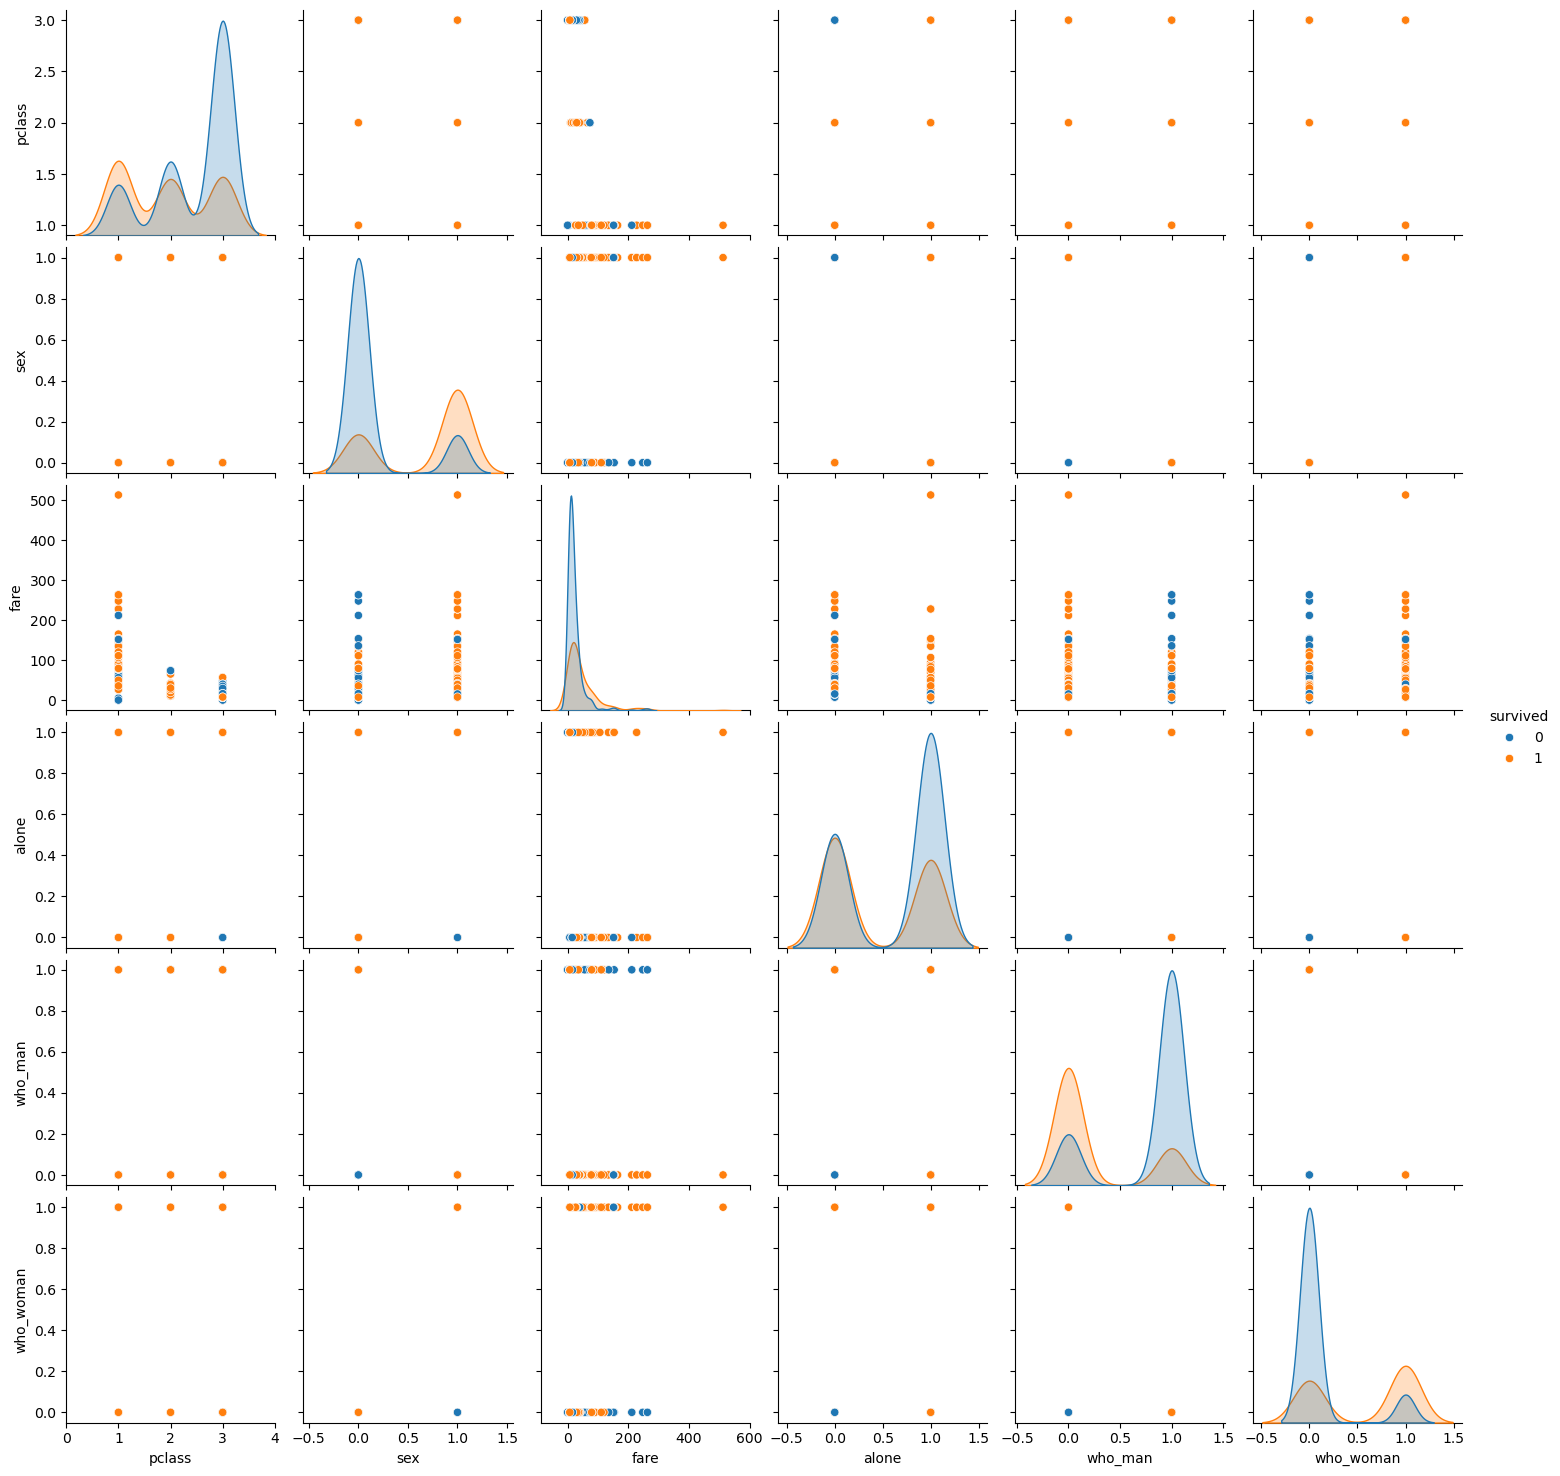

In [13]:
sns.pairplot(eda, hue = target)

In [14]:
X_train = X_train[[col for col in eda.columns if target not in col]].copy()

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'alone'}>],
       [<Axes: title={'center': 'who_man'}>,
        <Axes: title={'center': 'who_woman'}>]], dtype=object)

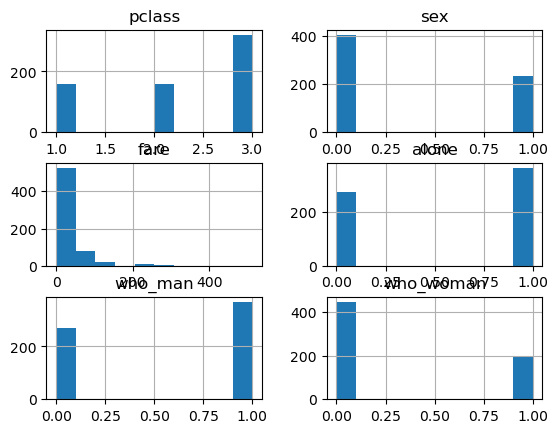

In [15]:
X_train.hist()

In [16]:
# Aplico transformación en 'fare'

X_train['fare'] = np.log(X_train['fare'] + 1) # +1 para no obtener -inf en los 'fare' = 0
X_test['fare'] = np.log(X_test['fare'] + 1) # +1 para no obtener -inf en los 'fare' = 0

In [17]:
# Escalamos las variables

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test[X_train.columns]), columns= X_train.columns)
X_train.describe()

,pclass,sex,fare,alone,who_man,who_woman
count,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,2.359224e-16,0.000000,-1.054712e-16,3.330669e-17,2.775558e-17,-2.775558e-18
std,1.000782e+00,1.000782,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00
min,-1.513057e+00,-0.759180,-3.281760e+00,-1.148408e+00,-1.170628e+00,-6.570901e-01
25%,-3.056299e-01,-0.759180,-8.833117e-01,-1.148408e+00,-1.170628e+00,-6.570901e-01
50%,9.017969e-01,-0.759180,-2.293618e-01,8.707708e-01,8.542422e-01,-6.570901e-01
75%,9.017969e-01,1.317210,5.021206e-01,8.707708e-01,8.542422e-01,1.521861e+00
max,9.017969e-01,1.317210,3.513573e+00,8.707708e-01,8.542422e-01,1.521861e+00


In [ ]:
# Entrenamos el modelo

log_reg = LogisticRegression(max_iter = 50000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=50000)

In [19]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-1.01306576  0.27318016 -0.12945932  0.09616947 -1.31897561 -0.08649457]]
[-0.57744077]
[0 1]


In [20]:
# Feature importance

intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
who_man,1.318976
pclass,1.013066
sex,0.273180
fare,0.129459
alone,0.096169


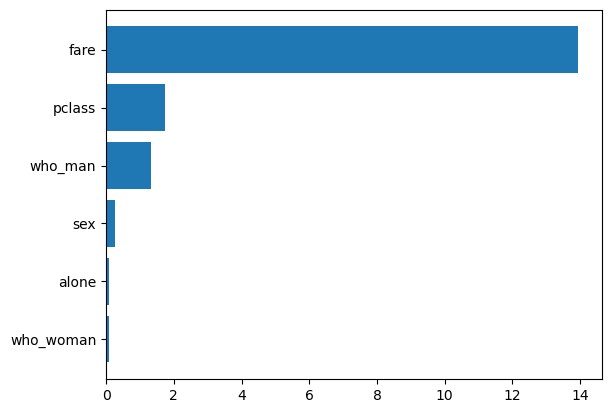

In [21]:
stdevs = []
for i in X_train.columns:
    stdev = data[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_standarized'] = features['importance'] / y_train.std()

features = features.sort_values('importance_standarized', ascending=True)
plt.barh(features.index, features.importance_standarized);

### Evaluación

In [22]:
acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

Accuracy train: 0.795
Accuracy test: 0.764


In [23]:
y_train.value_counts(True)

survived
0    0.595313
1    0.404687
Name: proportion, dtype: float64

In [24]:
y_test.value_counts(True)

survived
0    0.597222
1    0.402778
Name: proportion, dtype: float64

La accuracy es superior a la desproporción de la variable target, pero vamos a ver el resto de métricas

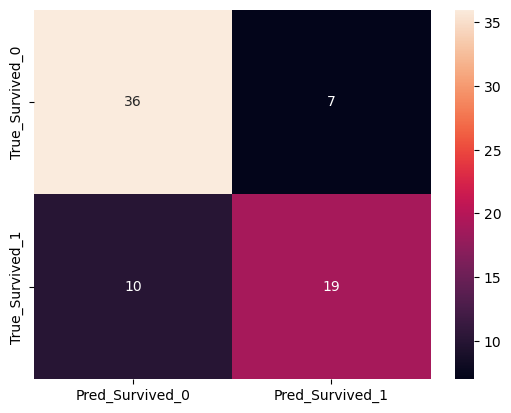

In [25]:
c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_Survived_0', 'Pred_Survived_1'],
                          index = ['True_Survived_0', 'True_Survived_1'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


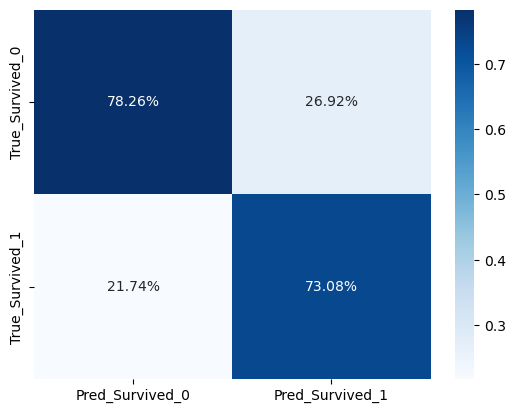

In [26]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues');

In [27]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        43
           1       0.73      0.66      0.69        29

    accuracy                           0.76        72
   macro avg       0.76      0.75      0.75        72
weighted avg       0.76      0.76      0.76        72



AUROC: 0.82


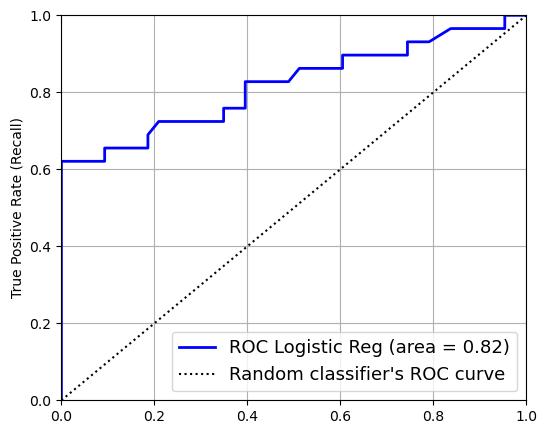

In [28]:
scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)